In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# Basic Scikit Tutorial
SVM - classification of handwritten digits

In [2]:
from sklearn import datasets, svm

In [3]:
digits = datasets.load_digits()
print("Input shape:", digits.data.shape)
print("Output shape:", digits.target.shape) # 0-9
digits.data

Input shape: (1797, 64)
Output shape: (1797,)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

<IPython.core.display.Javascript object>


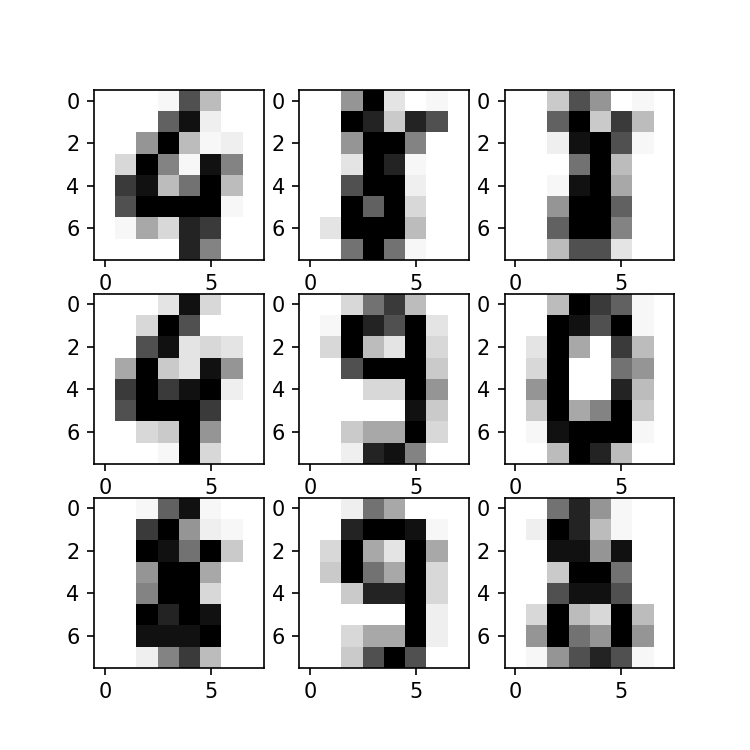

In [14]:
digits_x_train = digits.data[:-9]
digits_y_train = digits.target[:-9]

f, axs = plt.subplots(3, 3, figsize=(5, 5))
for i in range(9):
    plt.axes(axs[i//3, i%3])
    plt.imshow(digits.data[-9 + i].reshape((8,8)), cmap='Greys')

In [15]:
clf = svm.SVC(gamma=0.001, C=100.0)  # C=error coefficient
# TODO: figure what gamma is for (Kernal coefficient?)
clf.fit(digits_x_train, digits_y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
clf.predict(digits.data[-9:])

array([4, 8, 8, 4, 9, 0, 8, 9, 8])

# Regression
Using scikit-learn's boston house-prices dataset to predict home value from info

In [7]:
boston = datasets.load_boston()

print("Input shape:", boston.data.shape)
print("Output shape:", boston.target.shape) # 0-9
boston.data

Input shape: (506, 13)
Output shape: (506,)


array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [8]:
# Using Scikit's built-in model
from sklearn import linear_model

In [9]:
n = 56
x_train = boston.data[:-n]
y_train = boston.target[:-n]
x_test = boston.data[-n:]
y_test = boston.target[-n:]

In [10]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print(regr.coef_.shape)
print(regr.predict(x_test))
print("Mean Square Error:", np.mean((regr.predict(x_test)-y_test)**2))
regr.score(x_test, y_test)

(13,)
[ 16.87708355  20.00176976  19.09748901  23.20814177  15.61732627
  16.11179904  12.89417524  13.05769132  17.60907268  19.02500872
  19.56228736  20.75692019  20.32067933  23.17521618  20.6775203
  17.98688017  14.59451645  17.25588675  17.1412805   18.69010269
  20.59541332  23.55096067  22.86961063  26.03505314  16.7222898
  16.34436421  20.9957601   11.65982909  19.64392745  22.32837322
  23.86060017  27.72484729  29.27880958  21.24184418  19.55375857
  22.57034245  20.10253864  21.55409226  10.87766787   7.10159655
   2.33531983  12.90212573  15.07241997  20.2917649   20.14470152
  16.16731348  13.60687933  18.92620832  21.08772713  18.21418431
  20.37011473  23.66966908  22.54010176  28.11813701  26.57112983
  22.58745107]
Mean Square Error: 11.387892244


0.37669768810741033

# NN using Keras
Classifying scikit's handwritten digits

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

In [33]:
model = Sequential()
model.add(Dense(32, input_dim=64)) # 32 units
model.add(Activation('relu')) # __/ --> zeros out negative values
model.add(Dense(10))
model.add(Activation('softmax')) # normalizes final results to probability distribution
model.compile(loss='categorical_crossentropy', # See notebook
             optimizer='sgd', # Stochastic gradient descent
             metrics=['accuracy'])

In [37]:
one_hot = to_categorical(digits.target[:-500], num_classes=10)
# Converts labels to one-hot encoding
model.fit(digits.data[:-500], one_hot)

Epoch 1/10
1297/1297 [==============================] - 0s - loss: 0.0783 - acc: 0.9815     
Epoch 2/10
1297/1297 [==============================] - 0s - loss: 0.0673 - acc: 0.9861     
Epoch 3/10
1297/1297 [==============================] - 0s - loss: 0.0622 - acc: 0.9854     
Epoch 4/10
1297/1297 [==============================] - 0s - loss: 0.0575 - acc: 0.9884     
Epoch 5/10
1297/1297 [==============================] - 0s - loss: 0.0550 - acc: 0.9884     
Epoch 6/10
1297/1297 [==============================] - 0s - loss: 0.0486 - acc: 0.9923     
Epoch 7/10
1297/1297 [==============================] - 0s - loss: 0.0458 - acc: 0.9938     
Epoch 8/10
1297/1297 [==============================] - 0s - loss: 0.0424 - acc: 0.9938     
Epoch 9/10
1297/1297 [==============================] - 0s - loss: 0.0399 - acc: 0.9954     
Epoch 10/10
1297/1297 [==============================] - 0s - loss: 0.0381 - acc: 0.9938     


In [39]:
test_one_hot = to_categorical(digits.target[-500:], num_classes=10)
model.evaluate(digits.data[-500:], test_one_hot)

 32/500 [>.............................] - ETA: 0s

[0.14253468891978263, 0.95799999999999996]

In [40]:
np.argmax(model.predict(digits.data[-500:]), axis=1)

array([0, 1, 2, 3, 6, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5,
       5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0,
       1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0,
       0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0,
       5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4,
       9, 0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 9, 9, 0, 1, 2, 3, 4, 5, 6, 7, 9, 9,
       0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 3, 8, 4, 1,
       7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 9, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6,
       3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4,
       7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 7, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 1, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3, 4, 5, 4, 7, 5, 9,
       4, 9, 5, 5, 6, 5, 0, 9, 8, 5, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7,
       8, 2,

In [46]:
(np.argmax(model.predict(digits.data[-500:]), axis=1) - digits.target[-500:])
square_error = np.sum((np.argmax(model.predict(digits.data[-500:]), axis=1) - digits.target[-500:])**2)
square_error

304